<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_cluster_data(y_hat)_add_delta_(_3_6)_n120_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_-3.6'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-3.6_n120.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,55.244474,71.683663,49.203093,-0.000129,186.131102,186.131185,-0.000083
1,0.0,1.0,92.449461,46.867294,36.140696,-0.000575,185.456877,185.457112,-0.000236
2,0.0,2.0,33.758843,83.426636,94.252723,-0.000183,221.438018,221.438436,-0.000418
3,0.0,3.0,78.475237,90.734668,91.354182,-0.000012,270.564075,270.564133,-0.000057
4,0.0,4.0,86.007792,36.409882,78.824412,-0.002610,211.239475,211.241876,-0.002402
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,26.442424,77.324454,40.768469,-0.000362,154.534983,154.535283,-0.000300
119996,999.0,116.0,64.631774,31.561878,35.740263,0.004671,141.938587,141.934314,0.004272
119997,999.0,117.0,92.917875,93.838100,70.918143,-0.000319,267.673799,267.674184,-0.000385
119998,999.0,118.0,47.181659,30.964434,26.863902,-0.000041,115.009954,115.010348,-0.000395


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    55.244474  71.683663  49.203093 -0.000129  186.131102   
      1.0    92.449461  46.867294  36.140696 -0.000575  185.456877   
      2.0    33.758843  83.426636  94.252723 -0.000183  221.438018   
      3.0    78.475237  90.734668  91.354182 -0.000012  270.564075   
      4.0    86.007792  36.409882  78.824412 -0.002610  211.239475   
...                ...        ...        ...       ...         ...   
999.0 115.0  26.442424  77.324454  40.768469 -0.000362  154.534983   
      116.0  64.631774  31.561878  35.740263  0.004671  141.938587   
      117.0  92.917875  93.838100  70.918143 -0.000319  267.673799   
      118.0  47.181659  30.964434  26.863902 -0.000041  115.009954   
      119.0  38.740752  92.731045  83.238007 -0.000089  224.709714   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    186.131185 -0.000083  
      1.0    185.457112 -0.000236  
      2.0    221.438436 -0.000418  
      3.0    270.564133 -0.000057  
      4.0    211.241876 -0.002402  
...                 ...       ...  
999.0 115.0  154.535283 -0.000300  
      116.0  141.934314  0.004272  
      117.0  267.674184 -0.000385  
      118.0  115.010348 -0.000395  
      119.0  224.709488  0.000227  

[120000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    55.244474  71.683663  49.203093 -0.000129  186.131102   
      1.0    92.449461  46.867294  36.140696 -0.000575  185.456877   
      2.0    33.758843  83.426636  94.252723 -0.000183  221.438018   
      3.0    78.475237  90.734668  91.354182 -0.000012  270.564075   
      4.0    86.007792  36.409882  78.824412 -0.002610  211.239475   
...                ...        ...        ...       ...         ...   
999.0 115.0  26.442424  77.324454  40.768469 -0.000362  154.534983   
      116.0  64.631774  31.561878  35.740263  0.004671  141.938587   
      117.0  92.917875  93.838100  70.918143 -0.000319  267.673799   
      118.0  47.181659  30.964434  26.863902 -0.000041  115.009954   
      119.0  38.740752  92.731045  83.238007 -0.000089  224.709714   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    186.131185 -0.000083  
      1.0    185.457112 -0.000236  
      2.0    221.438436 -0.000418  
      3.0    270.564133 -0.000057  
      4.0    211.241876 -0.002402  
...                 ...       ...  
999.0 115.0  154.535283 -0.000300  
      116.0  141.934314  0.004272  
      117.0  267.674184 -0.000385  
      118.0  115.010348 -0.000395  
      119.0  224.709488  0.000227  

[120000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,55.244474,71.683663,49.203093,-0.000129,186.131102,186.131185,-0.000083
1,0.0,1.0,92.449461,46.867294,36.140696,-0.000575,185.456877,185.457112,-0.000236
2,0.0,2.0,33.758843,83.426636,94.252723,-0.000183,221.438018,221.438436,-0.000418
3,0.0,3.0,78.475237,90.734668,91.354182,-0.000012,270.564075,270.564133,-0.000057
4,0.0,4.0,86.007792,36.409882,78.824412,-0.002610,211.239475,211.241876,-0.002402
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,26.442424,77.324454,40.768469,-0.000362,154.534983,154.535283,-0.000300
119996,999.0,116.0,64.631774,31.561878,35.740263,0.004671,141.938587,141.934314,0.004272
119997,999.0,117.0,92.917875,93.838100,70.918143,-0.000319,267.673799,267.674184,-0.000385
119998,999.0,118.0,47.181659,30.964434,26.863902,-0.000041,115.009954,115.010348,-0.000395


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    55.244474  71.683663  49.203093 -0.000129  186.131102   
      1.0    92.449461  46.867294  36.140696 -0.000575  185.456877   
      2.0    33.758843  83.426636  94.252723 -0.000183  221.438018   
      3.0    78.475237  90.734668  91.354182 -0.000012  270.564075   
      4.0    86.007792  36.409882  78.824412 -0.002610  211.239475   
...                ...        ...        ...       ...         ...   
999.0 115.0  26.442424  77.324454  40.768469 -0.000362  154.534983   
      116.0  64.631774  31.561878  35.740263  0.004671  141.938587   
      117.0  92.917875  93.838100  70.918143 -0.000319  267.673799   
      118.0  47.181659  30.964434  26.863902 -0.000041  115.009954   
      119.0  38.740752  92.731045  83.238007 -0.000089  224.709714   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    186.131185 -0.000083  
      1.0    185.457112 -0.000236  
      2.0    221.438436 -0.000418  
      3.0    270.564133 -0.000057  
      4.0    211.241876 -0.002402  
...                 ...       ...  
999.0 115.0  154.535283 -0.000300  
      116.0  141.934314  0.004272  
      117.0  267.674184 -0.000385  
      118.0  115.010348 -0.000395  
      119.0  224.709488  0.000227  

[120000 rows x 7 columns]

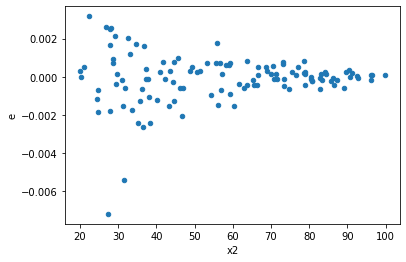

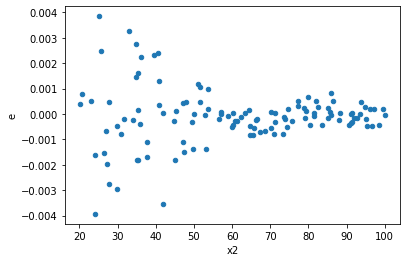

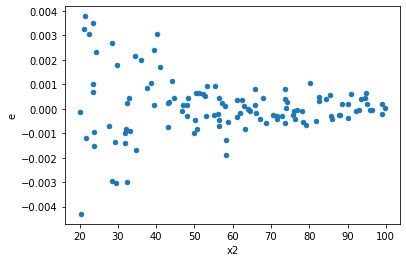

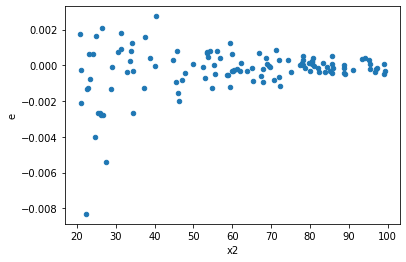

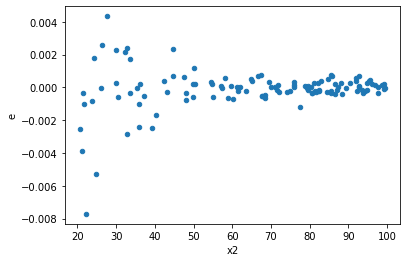

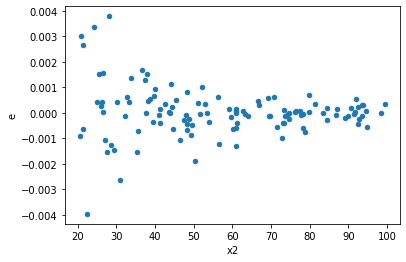

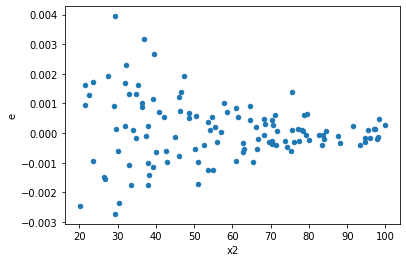

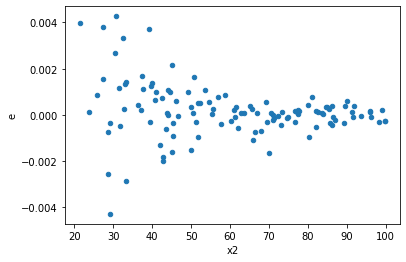

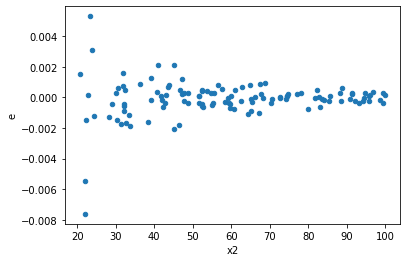

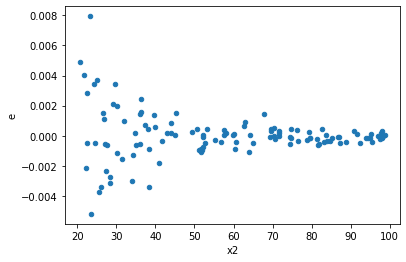

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,60.0,54.0,3.935833937275753e-05,0.00010038837633610953,6.559723228792921e-07,1.8590440062242506e-06,2.8340281157964955,0.00015088328089118974,0.9999245583595544,7.544164044559487e-05,Reject005=0 : Heteroscedasticity
5.0,60.0,54.0,1.4659148672168033e-05,9.37957920277657e-05,2.4431914453613387e-07,1.7369591116252908e-06,7.109386024263855,1.2470691146404533e-11,0.9999999999937647,6.235345573202267e-12,Reject005=0 : Heteroscedasticity
8.0,47.0,67.0,4.459283393731535e-05,0.00013652139654382609,9.487837007939437e-07,2.03763278423621e-06,2.1476262529922425,0.0040615159813659485,0.997969242009317,0.0020307579906829742,Reject005=0 : Heteroscedasticity
9.0,60.0,54.0,0.000104732092871297,0.00019337923078571376,1.7455348811882832e-06,3.5810968664021066e-06,2.0515756545433534,0.008092718429153267,0.9959536407854234,0.004046359214576634,Reject005=0 : Heteroscedasticity
10.0,56.0,58.0,2.9824968195254456e-05,0.00020741735859457143,5.32588717772401e-07,3.576161355078818e-06,6.714677265482503,1.5960788246616175e-11,0.9999999999920196,7.980394123308088e-12,Reject005=0 : Heteroscedasticity
12.0,58.0,56.0,4.791220490188515e-05,6.294288285802274e-05,8.260724983083647e-07,1.1239800510361204e-06,1.3606312440346486,0.24917039579657474,0.8754148021017126,0.12458519789828737,Reject005=1 : Homoscedasticity
18.0,45.0,69.0,2.2780671981515316e-05,0.0001845086298783989,5.062371551447848e-07,2.6740381141796944e-06,5.282184618422396,7.705156512827216e-10,0.9999999996147422,3.852578256413608e-10,Reject005=0 : Heteroscedasticity
24.0,64.0,50.0,3.168860347980882e-05,0.00011314837227376446,4.951344293720128e-07,2.2629674454752894e-06,4.570410198186881,1.340879933753314e-07,0.9999999329560033,6.70439966876657e-08,Reject005=0 : Heteroscedasticity
25.0,57.0,57.0,4.339786881081673e-05,0.00017541946629022774,7.613661194880128e-07,3.077534496319785e-06,4.042121677793201,4.2423048474127256e-07,0.9999997878847576,2.1211524237063628e-07,Reject005=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,60.0,54.0,0.00015252604908605266,4.290740050049195e-05,2.542100818100878e-06,7.945814907498509e-07,0.3125688348361641,1.7365948793371534e-05,Reject005=0 : Heteroscedasticity
1.0,60.0,54.0,3.935833937275753e-05,0.00010038837633610953,6.559723228792921e-07,1.8590440062242506e-06,2.8340281157964955,0.00015088328089118974,Reject005=0 : Heteroscedasticity
2.0,66.0,48.0,0.0001393951406657825,2.830192540858397e-05,2.1120475858451894e-06,5.89623446012166e-07,0.27917147793628583,2.0200571610081763e-06,Reject005=0 : Heteroscedasticity
3.0,47.0,67.0,0.0001530474823124035,2.348402921082326e-05,3.2563294109022017e-06,3.505078986690039e-07,0.10763895614967647,6.063370660774768e-13,Reject005=0 : Heteroscedasticity
4.0,58.0,56.0,0.00015022217782541765,3.908340636236007e-05,2.5900375487140975e-06,6.979179707564297e-07,0.26946249142331247,1.7058381557684641e-06,Reject005=0 : Heteroscedasticity
5.0,60.0,54.0,1.4659148672168033e-05,9.37957920277657e-05,2.4431914453613387e-07,1.7369591116252908e-06,7.109386024263855,1.2470691146404533e-11,Reject005=0 : Heteroscedasticity
6.0,57.0,57.0,6.444358407383683e-05,5.896899001930904e-05,1.130589194277839e-06,1.0345436845492815e-06,0.9150482684474033,0.7386736860137904,Reject005=1 : Homoscedasticity
7.0,54.0,60.0,0.00011036044066619976,4.6137468728584066e-05,2.0437118641888844e-06,7.689578121430678e-07,0.3762554915970283,0.0003622591833409915,Reject005=0 : Heteroscedasticity
8.0,47.0,67.0,4.459283393731535e-05,0.00013652139654382609,9.487837007939437e-07,2.03763278423621e-06,2.1476262529922425,0.0040615159813659485,Reject005=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    917
Reject005=1 : Homoscedasticity       83
Name: Result_test, dtype: int64